In [1]:
from TinkoffAPI_module.client import MyClient

client = MyClient()
for stock, info in client.get_my_stocks().items():
    print(stock)
    print(f"figi={info['figi']}")

Сбер Банк - привилегированные акции
figi=BBG0047315Y7
Роснефть
figi=BBG004731354
ЛУКОЙЛ
figi=BBG004731032
РУСАЛ
figi=BBG008F2T3T2
Доллар США
figi=BBG0013HGFT4


In [2]:
client.sell_stock(figi="BBG008F2T3T2", lots=1)

Succesfully made market order to sell stock with figi = BBG008F2T3T2


{'payload': {'commission': {'currency': 'RUB', 'value': 0.0},
             'executed_lots': 1,
             'message': None,
             'operation': 'Sell',
             'order_id': '31286233655',
             'reject_reason': None,
             'requested_lots': 1,
             'status': 'Fill'},
 'status': 'Ok',
 'tracking_id': '3be9824256ac76e6'}

In [3]:
client.buy_stock(figi="BBG008F2T3T2", lots=1)

Succesfully made market order to buy stock with figi = BBG008F2T3T2


{'payload': {'commission': {'currency': 'RUB', 'value': 0.0},
             'executed_lots': 1,
             'message': None,
             'operation': 'Buy',
             'order_id': '31286263310',
             'reject_reason': None,
             'requested_lots': 1,
             'status': 'Fill'},
 'status': 'Ok',
 'tracking_id': '19522ed451d3b843'}

In [16]:
from dataproccesing import dp 
from model import model, test
from datetime import datetime
import torch
from torch.optim import Adam

loss_fn = torch.nn.MSELoss(reduction="mean")
m = model.GRU(
    input_dim = 1,
    hidden_dim = 20,
    num_layers = 1,
    output_dim = 1
)
#optimizer = Adam(m.parameters(), lr = 0.001)
optimizer = torch.optim.SGD(m.parameters(), lr=0.1)
#lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 10, eta_min=0, last_epoch=- 1, verbose=False)
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, 0.9, last_epoch=- 1, verbose=False)
start = datetime(2018, 1, 1)
train_dl, test_dl = dp.get_dataloaders("PHOR.ME", start, 20, 50)
losses = model.train(m, train_dl, 100, optimizer, loss_fn)

Epoch: 0 | Loss: 0.013235251419246197
Epoch: 1 | Loss: 0.011851074174046516
Epoch: 2 | Loss: 0.00987255573272705
Epoch: 3 | Loss: 0.007448418065905571
Epoch: 4 | Loss: 0.004846174269914627
Epoch: 5 | Loss: 0.0025921098422259092
Epoch: 6 | Loss: 0.0011216800194233656
Epoch: 7 | Loss: 0.0004013211582787335
Epoch: 8 | Loss: 0.00012031205551465973
Epoch: 9 | Loss: 2.7056416001869366e-05
Epoch: 10 | Loss: 4.1904422687366605e-07
Epoch: 11 | Loss: 3.404692961339606e-06
Epoch: 12 | Loss: 1.9352000890648924e-05
Epoch: 13 | Loss: 2.7550682716537267e-05
Epoch: 14 | Loss: 6.352193304337561e-05
Epoch: 15 | Loss: 3.1569692509947345e-05
Epoch: 16 | Loss: 1.598743074282538e-05
Epoch: 17 | Loss: 1.3433536878437735e-05
Epoch: 18 | Loss: 2.0463003238546662e-05
Epoch: 19 | Loss: 1.358481199531525e-06
Epoch: 20 | Loss: 6.143307928141439e-06
Epoch: 21 | Loss: 8.0141226987962e-08
Epoch: 22 | Loss: 1.0591777481749887e-06
Epoch: 23 | Loss: 5.184804649616126e-06
Epoch: 24 | Loss: 3.794328586081974e-05
Epoch: 25

In [5]:
#sber.me - adam, lr = 0.001
preds_lr, true_values = test(m, test_dl)

In [7]:
#sber.me - adam, lr = cosine
preds_cos, true_values = test(m, test_dl)

In [9]:
#sber.me - adam, lr = exp
preds_exp, true_values = test(m, test_dl)

In [13]:
#sber.me - sgd
preds_sgd_lr, true_values = test(m, test_dl)

In [15]:
#sber.me - sgd, cos
preds_sgd_cos, true_values = test(m, test_dl)

In [17]:
#sber.me - sgd, exp
preds_sgd_exp, true_values = test(m, test_dl)

In [20]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import numpy as np

print(f"Adam, lr=0.001, mae: {mae(preds_lr, true_values)}, root-mse: {np.sqrt(mse(preds_lr, true_values))}")
print(f"Adam, cosine-scheduler, mae: {mae(preds_cos, true_values)}, root-mse: {np.sqrt(mse(preds_cos, true_values))}")
print(f"Adam, exponential-scheduler, mae: {mae(preds_exp, true_values)}, root-mse: {np.sqrt(mse(preds_exp, true_values))}")
print(f"SGD, lr=0.001, mae: {mae(preds_sgd_lr, true_values)}, root-mse: {np.sqrt(mse(preds_sgd_lr, true_values))}")
print(f"SGD, cosine-scheduler, mae: {mae(preds_sgd_cos, true_values)}, root-mse: {np.sqrt(mse(preds_sgd_cos, true_values))}")
print(f"SGD, exponential-scheduler, mae: {mae(preds_sgd_exp, true_values)}, root-mse: {np.sqrt(mse(preds_sgd_exp, true_values))}")

Adam, lr=0.001, mae: 0.0862031840490845, root-mse: 0.1268788006920613
Adam, cosine-scheduler, mae: 0.1201502022878179, root-mse: 0.16493957863756872
Adam, exponential-scheduler, mae: 0.08260752373146561, root-mse: 0.11923063210090047
SGD, lr=0.001, mae: 0.4082198878223041, root-mse: 0.4281709301216678
SGD, cosine-scheduler, mae: 0.027283286570378068, root-mse: 0.05310188521161419
SGD, exponential-scheduler, mae: 0.02578032705581413, root-mse: 0.04806003584622632


c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarr

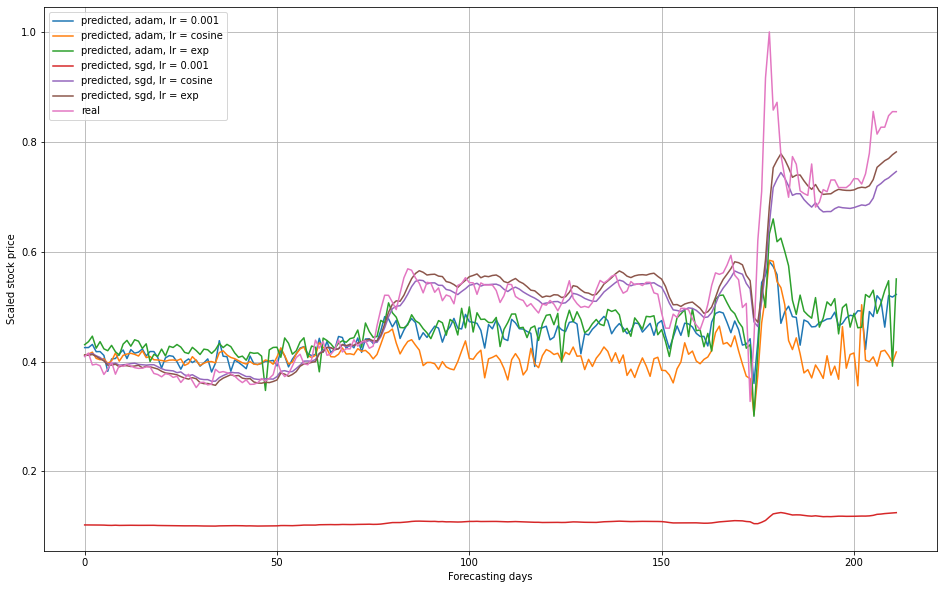

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.plot([i for i in range(len(true_values))], preds_lr, label="predicted, adam, lr = 0.001")
plt.plot([i for i in range(len(true_values))], preds_cos, label="predicted, adam, lr = cosine")
plt.plot([i for i in range(len(true_values))], preds_exp, label="predicted, adam, lr = exp")
plt.plot([i for i in range(len(true_values))], preds_sgd_lr, label="predicted, sgd, lr = 0.001")
plt.plot([i for i in range(len(true_values))], preds_sgd_cos, label="predicted, sgd, lr = cosine")
plt.plot([i for i in range(len(true_values))], preds_sgd_exp, label="predicted, sgd, lr = exp")
plt.plot([i for i in range(len(true_values))], true_values, label="real")
plt.legend()
plt.ylabel("Scaled stock price")
plt.xlabel("Forecasting days")
plt.grid()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
print(mae(true_values, preds_lr) * (356 - 37))
#print(mae(true_values, preds_cos)* (356 - 37))
##print(mae(true_values, preds_exp) * (356 - 37))
#print(mae(true_values, preds_sgd_lr) * (356 - 37))
#print(mae(true_values, preds_sgd_cos) * (356 - 37))
#print(mae(true_values, preds_sgd_exp) * (356 - 37))

13.720832354367062


c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:746: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)
c:\users\иван\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarr